In [1]:
import torch
flag = torch.cuda.is_available()
print(flag)

ngpu= 1
# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
print(device)
print(torch.cuda.get_device_name(0))
print(torch.rand(3,3).cuda())

True
cuda:0
GeForce MX150
tensor([[0.6771, 0.2226, 0.1521],
        [0.4306, 0.6920, 0.4271],
        [0.4752, 0.0732, 0.0008]], device='cuda:0')


# 建立數據集

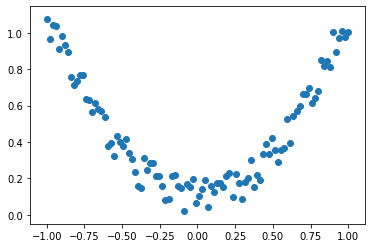

In [2]:
import torch
import matplotlib.pyplot as plt

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# 画图
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

# 建立神經網絡

In [3]:
import torch
import torch.nn.functional as F     # 激励函数都在这

class Net(torch.nn.Module):  # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        # 定义每层用什么样的形式
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.predict = torch.nn.Linear(n_hidden, n_output)   # 输出层线性输出

    def forward(self, x):   # 这同时也是 Module 中的 forward 功能
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.predict(x)             # 输出值
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)

print(net)  # net 的结构
"""
Net (
  (hidden): Linear (1 -> 10)
  (predict): Linear (10 -> 1)
)
"""

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


'\nNet (\n  (hidden): Linear (1 -> 10)\n  (predict): Linear (10 -> 1)\n)\n'

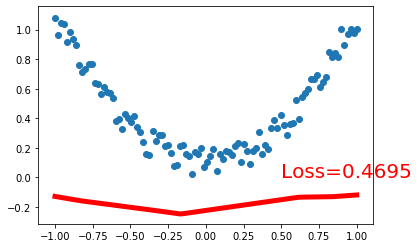

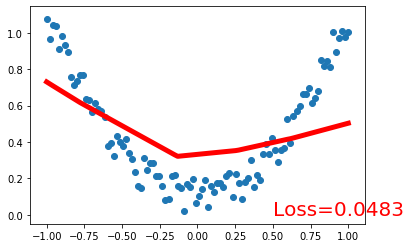

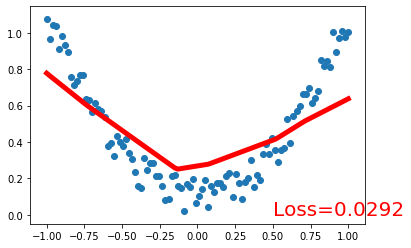

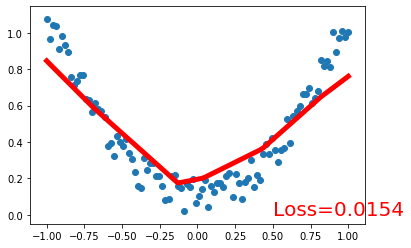

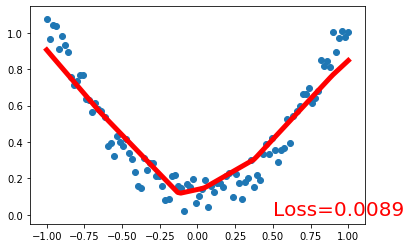

In [4]:
import matplotlib.pyplot as plt

plt.ion()   # 画图
plt.show()

# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)  # 传入 net 的所有参数, 学习率
loss_func = torch.nn.MSELoss()      # 预测值和真实值的误差计算公式 (均方差)

for t in range(100):
    prediction = net(x)     # 喂给 net 训练数据 x, 输出预测值
    loss = loss_func(prediction, y)     # 计算两者的误差

    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上
    if t % 20 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

# 保存

In [7]:
import os
if not os.path.exists('regression'): os.makedirs('regression')
torch.save(net, 'regression/net.pkl')  # 保存整个网络
torch.save(net.state_dict(), 'regression/net_params.pkl')   # 只保存网络中的参数 (速度快, 占内存少)

D:\Program\Anaconda3\envs\tensorflow\lib\site-packages\torch\serialization.py:241: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


# 提取網絡

In [11]:
def restore_net():
    net = torch.load('regression/net.pkl')
    prediction = net(x)
#     print(prediction)
    
restore_net()